In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Read Data
Data = pd.read_csv('Housing.csv')
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#Check Data Information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
#Perform Descriptive Statistics
Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Check Unique Values of every row for every column
N = Data.nunique(axis = 0)
print(f'Number of Unique Values in Every Column:\n{N}\n')

Number of Unique Values in Every Column:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64



In [6]:
#Count NaN Values in Data
CountNaN = Data.isna().sum()
print(f'Number of Missing Values in Every Variable:\n{CountNaN}\n')

Number of Missing Values in Every Variable:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64



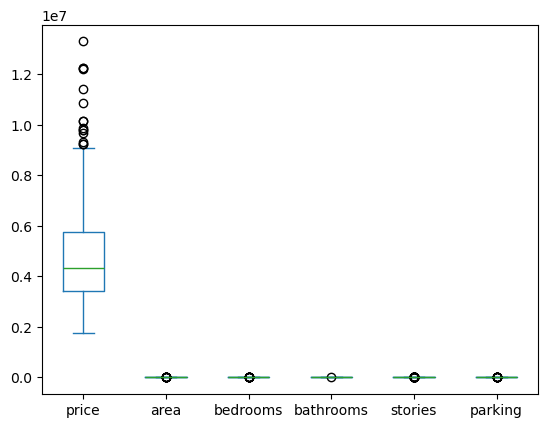

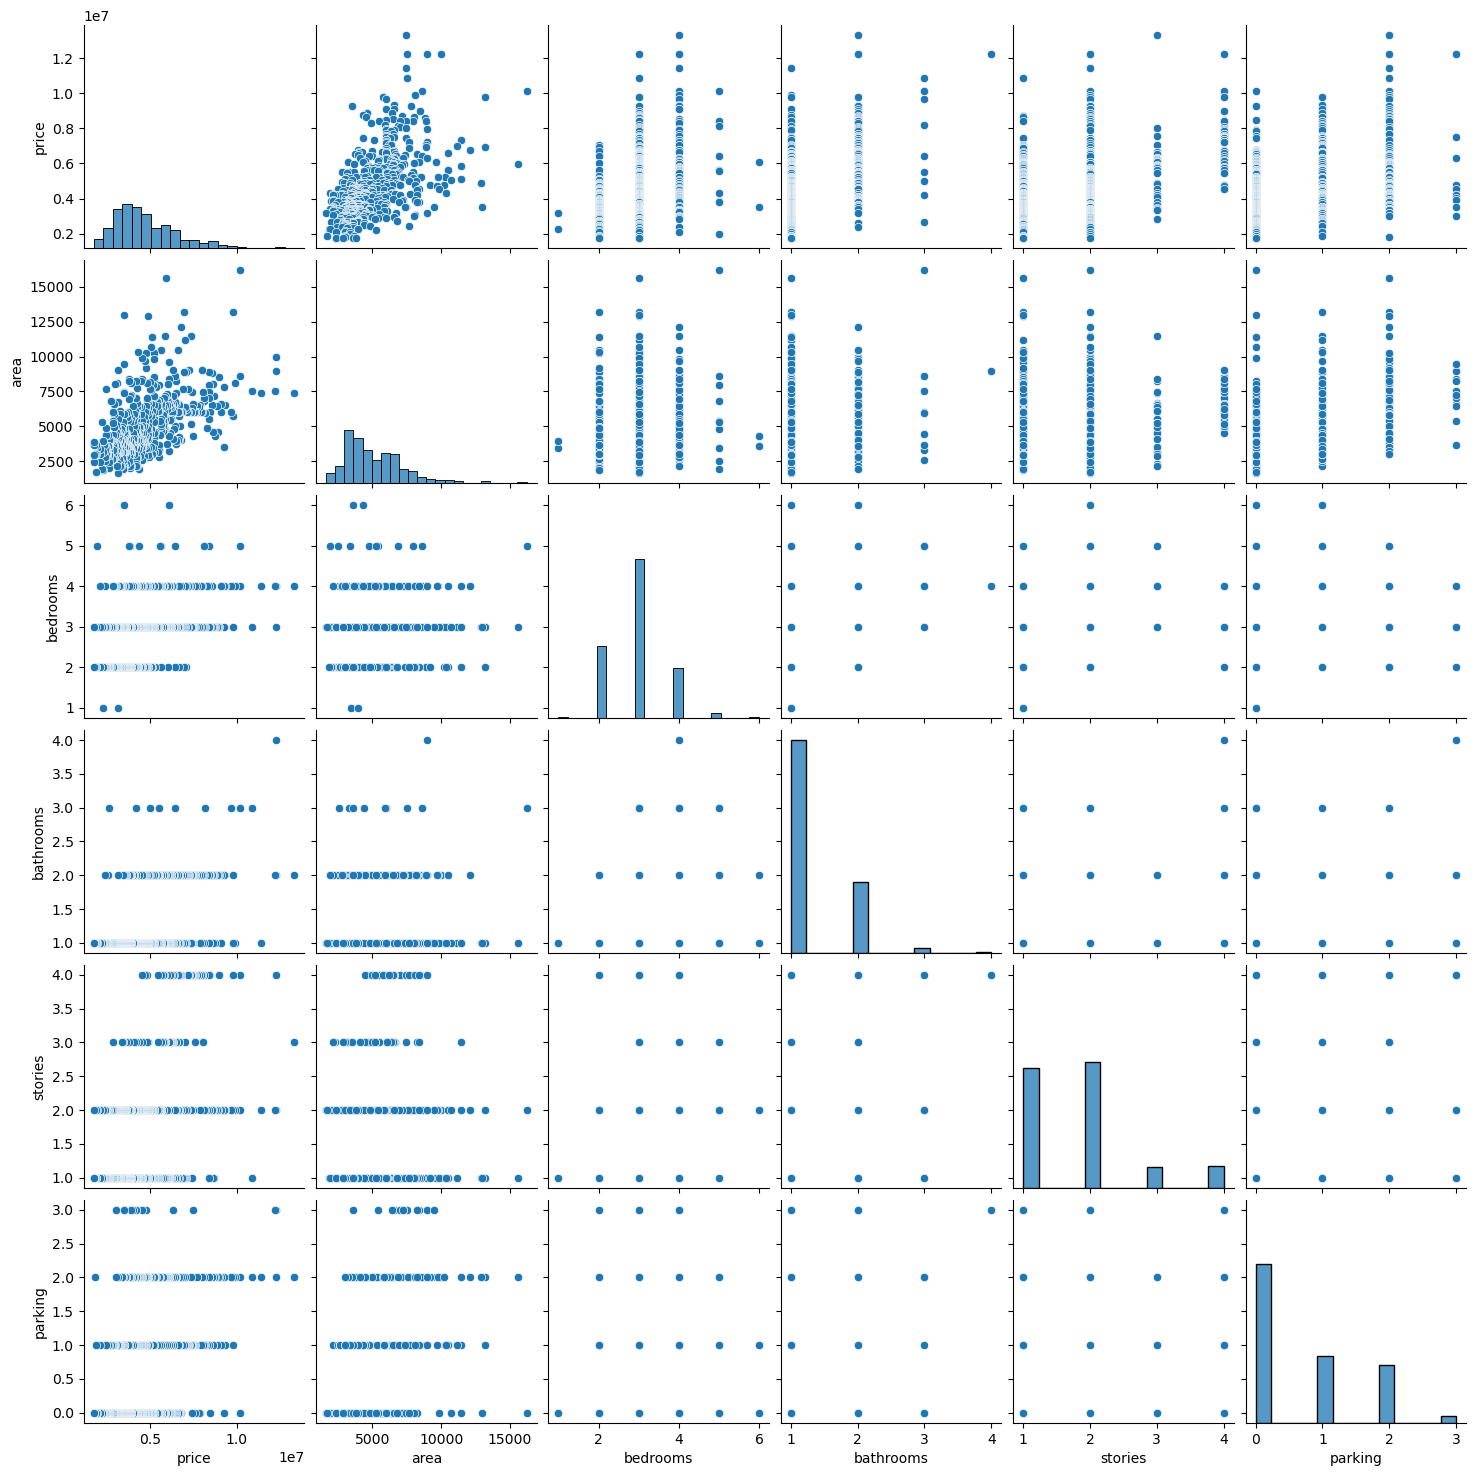

In [7]:
#Pair Plot Visualisation
Data.plot.box(column = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                      'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])
sns.pairplot(Data)
plt.show()

In [8]:
#Data Normalisation
Scaler = MinMaxScaler()
SC = ['price', 'area']
Data[SC] = Scaler.fit_transform(Data[SC])
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,0.909091,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,0.909091,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,0.906061,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,0.836364,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,0.001485,0.051546,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,0.000000,0.135395,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,0.000000,0.086598,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
#Preparing Model Training/Testing Data
X = Data.drop('price', axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = Data['price']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [10]:
#Model Training and Testing
Regressor = LinearRegression()
Regressor.fit(X_Train, Y_Train)
Y_Pred = Regressor.predict(X_Test)

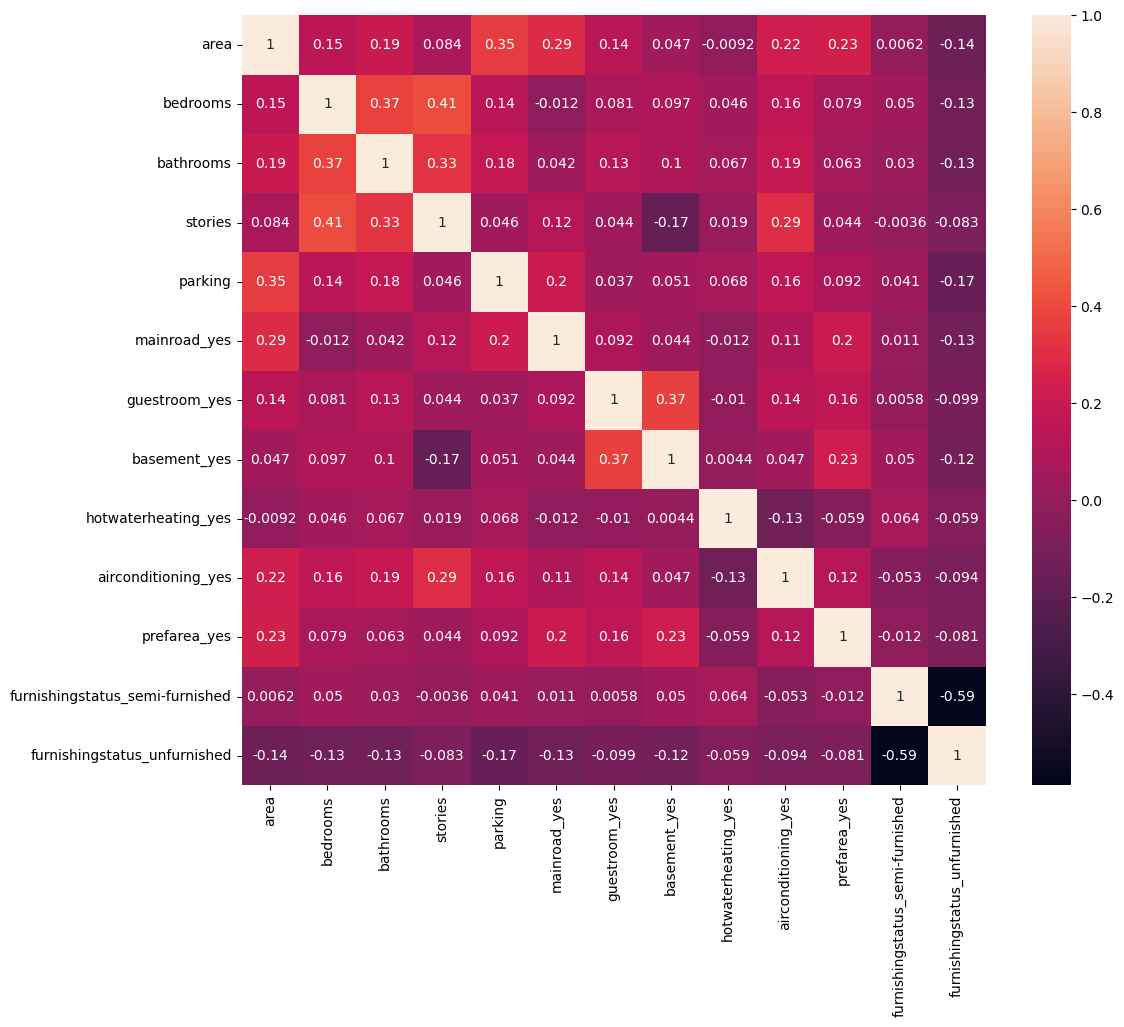

In [11]:
#Heatmap Visualisation
plt.figure(figsize=(12,10))
Correlation = X.corr()
sns.heatmap(Correlation, annot = True)
plt.show()

In [12]:
X_Train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
222,0.516564,2,1,1,2,True,False,True,False,True,False,True,False
70,0.161512,3,2,2,0,True,False,True,False,True,True,True,False
390,0.033333,3,2,2,0,False,False,False,False,False,False,False,True
257,0.453608,3,1,1,0,True,False,False,False,False,False,False,False
101,0.264605,3,1,3,1,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.123711,1,1,1,0,True,False,False,False,False,False,False,False
148,0.323711,3,1,3,0,True,False,False,False,False,True,True,False
411,0.034021,3,1,3,0,True,False,False,False,False,True,False,False
5,0.402062,3,3,1,2,True,False,True,False,True,True,True,False


In [13]:
X_Test

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
62,0.315464,4,2,2,1,True,False,False,False,True,False,False,False
315,0.271478,2,1,1,0,True,False,False,False,True,False,True,False
359,0.134021,3,1,1,1,True,False,False,False,False,False,False,True
74,0.164261,3,1,2,1,True,False,True,True,False,False,False,False
318,0.184880,3,1,1,0,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.461993,3,1,3,2,True,False,False,False,True,False,False,True
459,0.127148,2,1,1,0,True,False,False,False,False,False,False,True
43,0.298969,4,2,4,2,True,False,False,False,False,False,True,False
308,0.164674,3,1,2,1,True,False,True,False,False,False,True,False


In [14]:
Y_Train

222    0.260606
70     0.436364
390    0.151515
257    0.236364
101    0.387879
         ...   
445    0.121212
148    0.333333
411    0.145455
5      0.787879
207    0.272727
Name: price, Length: 381, dtype: float64

In [15]:
Y_Test

62     0.460606
315    0.203030
359    0.169697
74     0.424242
318    0.200000
         ...   
111    0.375758
459    0.118182
43     0.515152
308    0.209091
284    0.218182
Name: price, Length: 164, dtype: float64

In [16]:
Y_Pred

array([0.41404372, 0.21479115, 0.10642671, 0.30249752, 0.13038787,
       0.07644267, 0.18520219, 0.3770829 , 0.27821019, 0.5772077 ,
       0.25872022, 0.15402341, 0.08149271, 0.25660308, 0.19882302,
       0.25335565, 0.33167834, 0.51194343, 0.24833139, 0.11473866,
       0.28872603, 0.25470519, 0.06040277, 0.47216743, 0.0892529 ,
       0.48207077, 0.19430995, 0.35260455, 0.1255434 , 0.2986232 ,
       0.12116305, 0.25411368, 0.47436503, 0.575677  , 0.09199026,
       0.42963783, 0.45629555, 0.15247608, 0.41561854, 0.26670979,
       0.08504738, 0.45742485, 0.21748845, 0.3358764 , 0.33769175,
       0.06860082, 0.02998575, 0.48711655, 0.1266265 , 0.28436759,
       0.20858984, 0.07998995, 0.39602211, 0.3657212 , 0.44893645,
       0.09111835, 0.42301483, 0.25333438, 0.55516299, 0.39121824,
       0.49740238, 0.37565431, 0.20384335, 0.10378141, 0.27255152,
       0.27201772, 0.20870729, 0.10639699, 0.15447871, 0.24523235,
       0.08973645, 0.19667178, 0.20564828, 0.50790353, 0.22982

In [17]:
#Model Evaluation
MSE = mean_squared_error(Y_Test, Y_Pred)
MAE = mean_absolute_error(Y_Test, Y_Pred)
RMSE = np.sqrt(MSE)

In [18]:
MSE

0.008545713354149864

In [19]:
MAE

0.06871958361711097

In [20]:
RMSE

0.09244302761241577

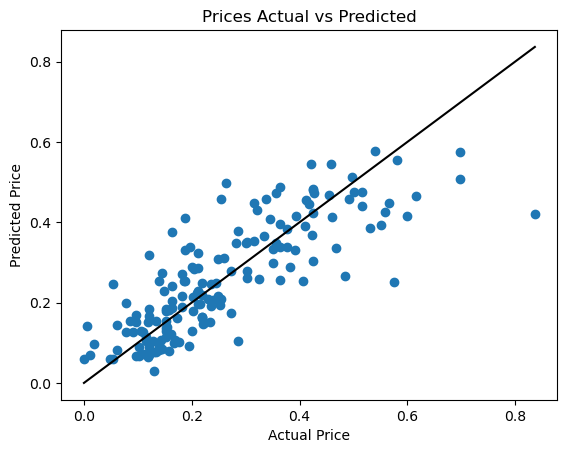

In [21]:
#Scatter Plot Visualisation
plt.scatter(Y_Test, Y_Pred)
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color = 'black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Prices Actual vs Predicted")
plt.show()